# PointCNN
Example of classification on modelnet40: http://modelnet.cs.princeton.edu/

In [15]:
import os
import sys
import tensorflow as tf
import numpy as np
import sklearn.metrics as met
import matplotlib.pyplot as plt
%matplotlib inline

from pointcnn_funcs import Pcnn_classif
from funcs_utils import plot_confusion_matrix, get_batch
import data_utils

## 1 - Load the data

In [3]:
modelnet_folder_path = '../data/modelnet/'

data_train = np.load(os.path.join(modelnet_folder_path, 'data_train.npy'))
label_train = np.load(os.path.join(modelnet_folder_path, 'label_train.npy'))
data_val = np.load(os.path.join(modelnet_folder_path, 'data_test.npy'))
label_val = np.load(os.path.join(modelnet_folder_path, 'label_test.npy'))

print('Data shape: ', data_train.shape)
print('Number of classes: ', np.unique(label_train).shape[0])

Data shape:  (9840, 2048, 6)
Number of classes:  40


## 2 - Create a model

In [4]:
# First load settings
import tuto_settings
# Settings contain variables used to set up the model
print('Settings: ')
print('Cloud point number: ', tuto_settings.cloud_point_nb)
print('learning_rate_base: ', tuto_settings.learning_rate_base)
print('...')

# Reset the default graph
tf.reset_default_graph()
# Init the model
pcnn = Pcnn_classif(setting=tuto_settings)

Settings: 
Cloud point number:  2048
learning_rate_base:  0.01
...
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [5]:
# You can also initialize the variables and get the session
sess = pcnn.initialize()

## 3 - Training
Summaries are written in the **summary_folder**. On another terminal, you can run:
```bash
tensorboard --logdir $(summary_folder)
```

In [6]:
batch_size = 12
# Corresponds to the number of samples used for training
total_num_el = 10000
# Summary for tensorboard
summary_folder = 'tf_summary'

pcnn.train(sess, data_train, label_train, batch_size, total_num_el,
              X_test=data_val, labels_test=label_val,
              summary_folder=summary_folder, summary_rate=10)

2018-08-01 08:50:56.459772-[Val  ]-Loss: 1.2459  Acc train: 0.6138  Acc test: 0.6587
2018-08-01 08:50:57.387181-[Val  ]-Loss: 1.8363  Acc train: 0.4929  Acc test: 0.6606
2018-08-01 08:50:58.319605-[Val  ]-Loss: 1.6300  Acc train: 0.5571  Acc test: 0.5571
2018-08-01 08:50:59.272277-[Val  ]-Loss: 0.7588  Acc train: 0.8110  Acc test: 0.6948
2018-08-01 08:51:00.229371-[Val  ]-Loss: 1.0778  Acc train: 0.6636  Acc test: 0.3816


## 4 - Save model

In [7]:
pcnn.save_model(sess, save_path='../models/model_tuto.ckpt')

## 5 - Load model

In [8]:
# First load settings
import tuto_settings
# Settings contain variables used to set up the model
print('Settings: ')
print('Cloud point number: ', tuto_settings.cloud_point_nb)
print('learning_rate_base: ', tuto_settings.learning_rate_base)
print('...')

# Reset the default graph
tf.reset_default_graph()
# Init the model
pcnn = Pcnn_classif(setting=tuto_settings)

Settings: 
Cloud point number:  2048
learning_rate_base:  0.01
...


In [9]:
sess = pcnn.initialize()
pcnn.load_model(sess, save_path='../models/model_tuto.ckpt')

INFO:tensorflow:Restoring parameters from ../models/model_tuto.ckpt


## 7 - Use predict function

In [13]:
%%time
preds, probas = pcnn.predict(sess, data_val, batch_size=16)
print('Accuracy on test: ', met.accuracy_score(label_val, preds))

Accuracy on test:  0.7042139384116693
CPU times: user 12.4 s, sys: 1.19 s, total: 13.6 s
Wall time: 8.13 s


## 8 - Visualize results

Normalized confusion matrix


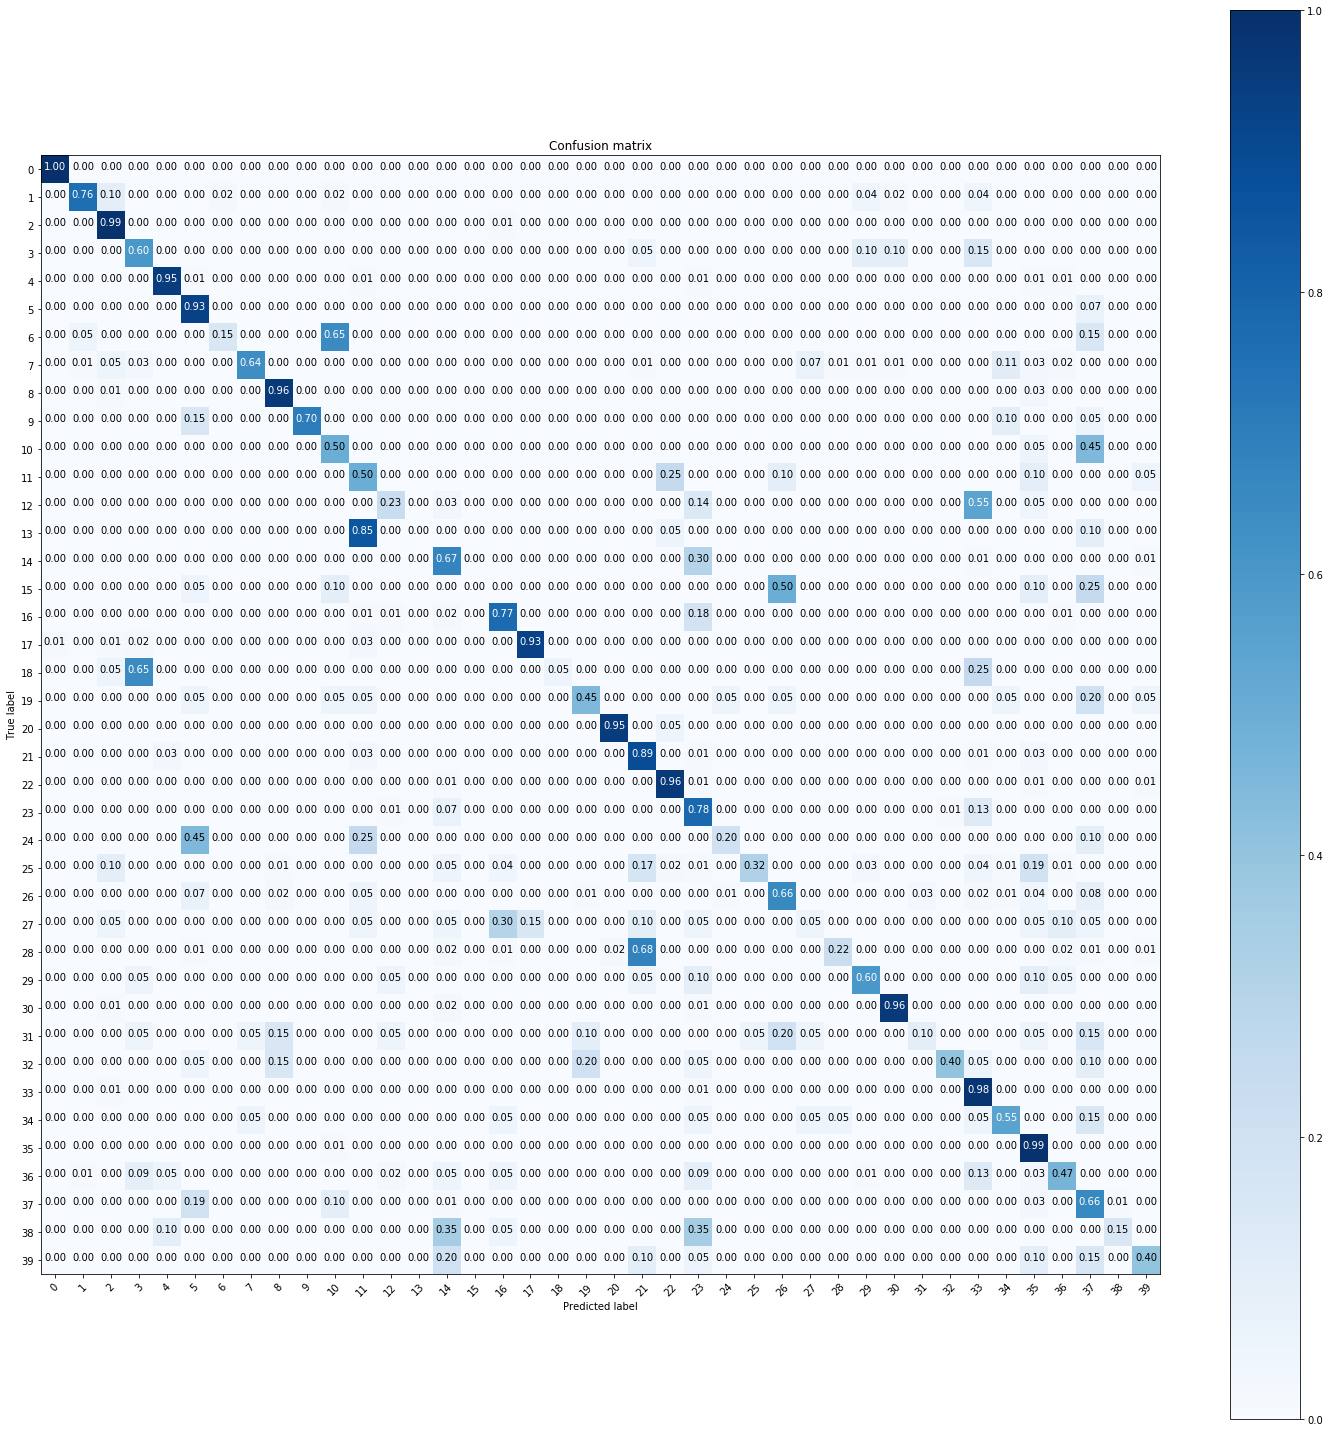

In [17]:
cm = met.confusion_matrix(label_val, preds)

plt.figure(figsize=(20,20))
plot_confusion_matrix(cm, classes=np.unique(label_train), normalize=True)